In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/Preprocessed_Bank_Customer_Churn_Prediction.csv')

# 사용할 피처 선택 (customer_id 제거)
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

X = df[features]
y = df['churn']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 출력
print('리포트 :\n', classification_report(y_test, y_pred, digits=4))

리포트 :
               precision    recall  f1-score   support

           0     0.8648    0.8349    0.8496      1593
           1     0.4307    0.4889    0.4580       407

    accuracy                         0.7645      2000
   macro avg     0.6477    0.6619    0.6538      2000
weighted avg     0.7764    0.7645    0.7699      2000



In [ ]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': range(1, 11),
#     # 'criterion': ['gini', 'entropy'],
#     # 'splitter': ['best', 'random'],
#     'min_samples_split': range(2, 11),
#     'min_samples_leaf': range(1, 11),
# }

# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# 
# .fit(X_train, y_train)

# print('최적의 하이퍼파라미터 :', grid_search.best_params_)

# 최적의 하이퍼파라미터 : {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}

from sklearn.metrics import classification_report
# 최적의 하이퍼파라미터로 학습
clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=7, min_samples_split=2)

clf.fit(X_train, y_train)
# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8681    0.9705    0.9164      1593
           1     0.7854    0.4226    0.5495       407

    accuracy                         0.8590      2000
   macro avg     0.8267    0.6966    0.7330      2000
weighted avg     0.8512    0.8590    0.8418      2000


In [60]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print('리포트 :\n', classification_report(y_test, y_pred, digits=4))

리포트 :
               precision    recall  f1-score   support

           0     0.8682    0.9636    0.9134      1593
           1     0.7500    0.4275    0.5446       407

    accuracy                         0.8545      2000
   macro avg     0.8091    0.6956    0.7290      2000
weighted avg     0.8442    0.8545    0.8384      2000



In [62]:
# from sklearn.model_selection import GridSearchCV

# # 그리드 탐색을 위한 파라미터 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
# }

# # 랜덤 포레스트 모델 생성
# rf = RandomForestClassifier(random_state=42)

# # 그리드 탐색 수행
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# # 최적의 파라미터 출력
# print('최적의 파라미터 :', grid_search.best_params_)

In [63]:
# 최적의 파라미터 : {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=2, min_samples_split=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8679    0.9692    0.9158      1593
           1     0.7783    0.4226    0.5478       407

    accuracy                         0.8580      2000
   macro avg     0.8231    0.6959    0.7318      2000
weighted avg     0.8497    0.8580    0.8409      2000



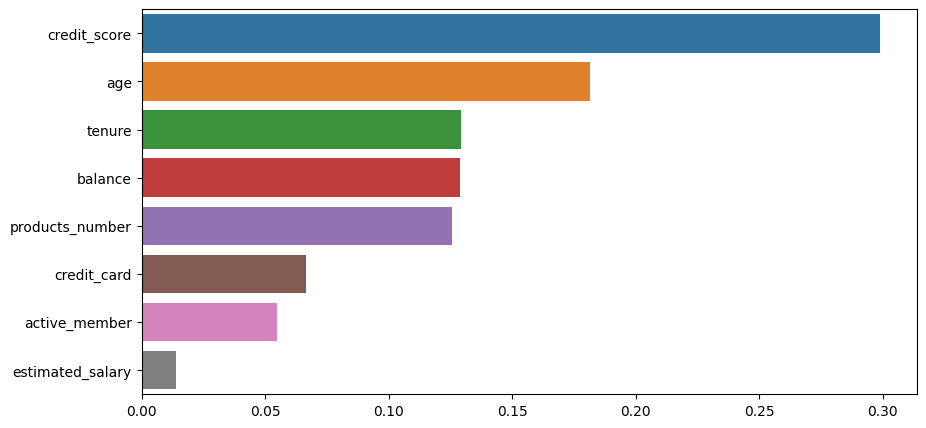

In [64]:
# 피처 중요도 출력
feature_importances = rf.feature_importances_
# 정렬
feature_importances = np.sort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, hue=features, dodge=False)
plt.show()

In [65]:
# !pip install imbalanced-learn

In [66]:
# imbalanced-learn 패키지
from imblearn.over_sampling import SMOTE

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=42)

# 오버샘플링 적용
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [67]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=7, min_samples_split=2)

# 학습
dt.fit(X_train_over, y_train_over)

# 예측
y_pred = dt.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9132    0.8054    0.8559      1593
           1     0.4790    0.7002    0.5689       407

    accuracy                         0.7840      2000
   macro avg     0.6961    0.7528    0.7124      2000
weighted avg     0.8248    0.7840    0.7975      2000



In [68]:
rf = RandomForestClassifier(random_state=42, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

# 학습
rf.fit(X_train_over, y_train_over)

# 예측
y_pred = rf.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9013    0.8255    0.8617      1593
           1     0.4861    0.6462    0.5549       407

    accuracy                         0.7890      2000
   macro avg     0.6937    0.7358    0.7083      2000
weighted avg     0.8168    0.7890    0.7993      2000



In [69]:
# 클래스 가중치 설정

# 클래스 불균형이 심할 경우 클래스 가중치를 설정하여 학습

# 클래스 불균형이 심한 경우 클래스 가중치 설정
class_weight = {
    0: 1,
    1: 4
}

# 랜덤 포레스트 모델 생성

rf = RandomForestClassifier(random_state=42, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200, class_weight=class_weight)

rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8836    0.9146    0.8988      1593
           1     0.6125    0.5283    0.5673       407

    accuracy                         0.8360      2000
   macro avg     0.7481    0.7214    0.7331      2000
weighted avg     0.8284    0.8360    0.8314      2000



In [70]:
# threshold 조정

# 임계값을 조정하여 클래스의 확률을 기반으로 예측
# 클래스 1의 임계값을 0.3으로 설정
y_pred = (rf.predict_proba(X_test)[:, 1] >= 0.3).astype(int)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9210    0.7464    0.8245      1593
           1     0.4302    0.7494    0.5466       407

    accuracy                         0.7470      2000
   macro avg     0.6756    0.7479    0.6856      2000
weighted avg     0.8211    0.7470    0.7680      2000



In [71]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
# catboost 모델 적용
from catboost import CatBoostClassifier

# CatBoost 모델 생성

cat = CatBoostClassifier(random_state=42)

# 학습
cat.fit(X_train, y_train)

Learning rate set to 0.025035
0:	learn: 0.6721703	total: 9.64ms	remaining: 9.63s
1:	learn: 0.6519753	total: 12.6ms	remaining: 6.3s
2:	learn: 0.6345669	total: 25ms	remaining: 8.31s
3:	learn: 0.6179902	total: 34.8ms	remaining: 8.67s
4:	learn: 0.6029705	total: 39.4ms	remaining: 7.85s
5:	learn: 0.5899764	total: 43ms	remaining: 7.12s
6:	learn: 0.5751954	total: 45.2ms	remaining: 6.41s
7:	learn: 0.5625233	total: 47.1ms	remaining: 5.84s
8:	learn: 0.5497546	total: 49.5ms	remaining: 5.45s
9:	learn: 0.5384523	total: 52.1ms	remaining: 5.16s
10:	learn: 0.5290159	total: 54.2ms	remaining: 4.87s
11:	learn: 0.5183975	total: 56.1ms	remaining: 4.62s
12:	learn: 0.5092076	total: 58.2ms	remaining: 4.42s
13:	learn: 0.5021559	total: 61.7ms	remaining: 4.34s
14:	learn: 0.4928693	total: 64.1ms	remaining: 4.21s
15:	learn: 0.4852180	total: 66.4ms	remaining: 4.08s
16:	learn: 0.4775031	total: 68.5ms	remaining: 3.96s
17:	learn: 0.4696892	total: 70.6ms	remaining: 3.85s
18:	learn: 0.4630233	total: 72.5ms	remaining: 3.7

In [73]:
# 예측
y_pred = cat.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8718    0.9648    0.9160      1593
           1     0.7637    0.4447    0.5621       407

    accuracy                         0.8590      2000
   macro avg     0.8178    0.7048    0.7390      2000
weighted avg     0.8498    0.8590    0.8440      2000



In [78]:
# param_grid = {
#     'depth': [2,3,4],
#     'learning_rate': [0.05, 0.1, 0.5],
#     'iterations': [50, 100, 150],
# }

# grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print('최적의 파라미터 :', grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 0.6707557	total: 67.1ms	remaining: 3.29s
1:	learn: 0.6500760	total: 70ms	remaining: 1.68s
2:	learn: 0.6318769	total: 71.1ms	remaining: 1.11s
3:	learn: 0.6159875	total: 72.8ms	remaining: 838ms
0:	learn: 0.6709100	total: 118ms	remaining: 5.77s
4:	learn: 0.6006403	total: 74.2ms	remaining: 668ms
5:	learn: 0.5858450	total: 75ms	remaining: 550ms
6:	learn: 0.5735950	total: 75.9ms	remaining: 466ms
7:	learn: 0.5614408	total: 77.7ms	remaining: 408ms
0:	learn: 0.6495330	total: 109ms	remaining: 5.34s
8:	learn: 0.5500222	total: 78.7ms	remaining: 358ms
1:	learn: 0.6503070	total: 120ms	remaining: 2.88s
9:	learn: 0.5401671	total: 82.4ms	remaining: 330ms
1:	learn: 0.6129564	total: 115ms	remaining: 2.76s
2:	learn: 0.5832961	total: 116ms	remaining: 1.81s
10:	learn: 0.5302977	total: 86.3ms	remaining: 306ms
3:	learn: 0.5567531	total: 117ms	remaining: 1.35s
11:	learn: 0.5207726	total: 87.3ms	remaining: 276ms
12:	learn: 0.5120646	total: 8

In [82]:
# 최적의 파라미터 : {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

cat = CatBoostClassifier(random_state=42, depth=4, iterations=100, learning_rate=0.1)

cat.fit(X_train, y_train)

0:	learn: 0.6438675	total: 3.14ms	remaining: 311ms
1:	learn: 0.6022502	total: 4.82ms	remaining: 236ms
2:	learn: 0.5707101	total: 5.93ms	remaining: 192ms
3:	learn: 0.5425939	total: 6.91ms	remaining: 166ms
4:	learn: 0.5189054	total: 7.85ms	remaining: 149ms
5:	learn: 0.4991506	total: 8.67ms	remaining: 136ms
6:	learn: 0.4808830	total: 9.46ms	remaining: 126ms
7:	learn: 0.4647463	total: 10.2ms	remaining: 118ms
8:	learn: 0.4521963	total: 11.1ms	remaining: 113ms
9:	learn: 0.4418610	total: 11.9ms	remaining: 107ms
10:	learn: 0.4320838	total: 12.7ms	remaining: 103ms
11:	learn: 0.4234929	total: 13.4ms	remaining: 98.6ms
12:	learn: 0.4161496	total: 14.4ms	remaining: 96.4ms
13:	learn: 0.4114258	total: 15.3ms	remaining: 94.1ms
14:	learn: 0.4047363	total: 16.1ms	remaining: 91.2ms
15:	learn: 0.3993282	total: 16.9ms	remaining: 88.7ms
16:	learn: 0.3944215	total: 17.7ms	remaining: 86.3ms
17:	learn: 0.3897186	total: 18.4ms	remaining: 83.9ms
18:	learn: 0.3859910	total: 19.2ms	remaining: 81.7ms
19:	learn: 0.3

In [83]:
y_pred = cat.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8700    0.9661    0.9155      1593
           1     0.7662    0.4349    0.5549       407

    accuracy                         0.8580      2000
   macro avg     0.8181    0.7005    0.7352      2000
weighted avg     0.8489    0.8580    0.8421      2000



| 모델              | 정확도  | 정밀도 (0) | 정밀도 (1) | 재현율 (0) | 재현율 (1) | F1 Score (0) | F1 Score (1) |
|-----------------|--------|---------|---------|---------|---------|------------|------------|
| 검증트리 (전)   | 0.7645 | 0.8648  | 0.4307  | 0.8349  | 0.4889  | 0.8496     | 0.4580     |
| 검증트리 (후)   | 0.8590 | 0.8681  | 0.7854  | 0.9705  | 0.4226  | 0.9164     | 0.5495     |
| 랜덤 포레스트 (전) | 0.8545 | 0.8682  | 0.7500  | 0.9636  | 0.4275  | 0.9134     | 0.5446     |
| 랜덤 포레스트 (후) | 0.8580 | 0.8679  | 0.7783  | 0.9692  | 0.4226  | 0.9158     | 0.5478     |
| 캣부스트 (전)   | 0.8590 | 0.8718  | 0.7637  | 0.9648  | 0.4447  | 0.9160     | 0.5621     |
| 캣부스트 (후)   | 0.8580 | 0.8700  | 0.7662  | 0.9661  | 0.4349  | 0.9155     | 0.5549     |


# 🔍 인사이트 분석

## 1️⃣ **튜닝 전후 성능 변화**
✅ **튜닝 후 모든 모델의 정확도 향상**  
- 검증트리: **76.45% → 85.90% (가장 큰 향상)**  
- 랜덤 포레스트: **85.45% → 85.80% (소폭 개선)**  
- 캣부스트: **85.90% → 85.80% (큰 변화 없음)**  

✅ **정밀도(1) 향상, 재현율(1) 감소**  
- 검증트리 정밀도(1): **43.07% → 78.54% (대폭 증가)**  
- 하지만 **재현율(1)은 48.89% → 42.26%로 감소** → 모델이 더 보수적으로 판단  

---

## 2️⃣ **모델별 특징 비교**
### 🌲 **검증트리**
- **튜닝 후 정확도 상승폭이 가장 큼** (76.45% → 85.90%)
- **정밀도(1) 대폭 향상 (43.07% → 78.54%)**, 하지만 **재현율(1) 감소 (48.89% → 42.26%)**
- ✅ **양성(1)을 신중하게 예측하는 모델로 변경됨**  
- ❌ **실제 양성을 놓칠 가능성이 높아짐**  

### 🌳 **랜덤 포레스트**
- **전체적으로 균형 잡힌 성능 유지**  
- 정밀도(1)와 재현율(1)의 **변화 폭이 적음**  
- ✅ **신뢰성이 높고 과적합 가능성이 적음**  
- ❌ **검증트리보다 정밀도(1) 개선 폭이 적음**  

### 🐱 **캣부스트**
- **F1 Score(1)이 가장 높음 (전: 56.21%, 후: 55.49%)**
- **정밀도(1)와 재현율(1)의 균형이 가장 좋음**  
- ✅ **양성과 음성을 모두 고르게 잘 예측**  
- ❌ **튜닝 후 성능 향상이 거의 없음**  

---

## 3️⃣ **최적의 모델 선택 가이드**
| 목표  | 최적의 모델 |
|------|------------|
| **최고의 정확도** | 검증트리 (튜닝 후) |
| **최고의 정밀도(1)** | 검증트리 (튜닝 후) |
| **최고의 재현율(1)** | 캣부스트 (튜닝 전) |
| **가장 균형 잡힌 성능** | 캣부스트 (튜닝 전) |

✅ **정확도가 중요하면 → `검증트리 (튜닝 후)`**  
✅ **재현율이 중요하면 → `캣부스트 (튜닝 전)`**  
✅ **균형 잡힌 성능을 원하면 → `캣부스트 (튜닝 전)`**  

---

# 🏆 **최종 결론**
- **검증트리 (튜닝 후)**: 정확도와 정밀도를 극대화 → False Positive 최소화  
- **랜덤 포레스트 (튜닝 후)**: 안정적이고 신뢰성이 높은 성능  
- **캣부스트 (튜닝 전)**: 가장 균형 잡힌 모델, 재현율(1) 유지  

🎯 **목적에 따라 최적의 모델을 선택하는 것이 중요!**